#Fake Person Detector

**Summary**

In this model it's aimed to create a network that can analyse and determine wheter given input is a real human picture or a computer generated fake human picture.

To achieve that a CNN model with various layers is being used.




Author:

Ömer Cem Turan

omercemturan@gmail.com

160503133


#Importing libraries

Keras and Tensorflow is being used in this project.

And also GPU acceleration of Google Colab will help to model to process the given data faster.

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.models import Sequential
from keras.layers import Dense,Flatten, GlobalAveragePooling2D, BatchNormalization, Activation, Dropout, Conv2D,MaxPooling2D
from keras.optimizers import Adam
import tensorflow as tf
from keras import backend as K
from tensorflow.python.client import device_lib
from PIL import Image
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


Using TensorFlow backend.


In [2]:
import os


In [3]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15781206625674556553, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 689493306797810393
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 11279497585267779517
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15701463552
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4434238930952366748
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

#Importing Data

Check wheter google drive is connected or not. If 'training_set' and 
'test_set' are shown, data is ready to be processed

In [7]:
import zipfile
from google.colab import drive


zip_ref = zipfile.ZipFile("/content/drive/My Drive/DeepLearning/data/project_data.zip", 'r')
zip_ref.extractall("/content/tmp/")
zip_ref.close()

In [4]:
print(os.listdir("/content/tmp/project_data"))


['training_set', '.DS_Store', 'test_set']


#Preparing Input Data

Input data consist of PNG pictures with the resolution of 128x128

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

#Setting Input Path and Data Properties

Resolution is 128x128 for each image

Setting batch size to 64

This network is going to give output data in binary

In [6]:
training_set = train_datagen.flow_from_directory('/content/tmp/project_data/training_set',
                                                 target_size = (128, 128),
                                                 batch_size = 64,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/tmp/project_data/test_set',
                                            target_size = (128, 128),
                                            batch_size = 64,
                                            class_mode = 'binary')

Found 18999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#Initializing Layers

This model consist of 4 CNN Filters with Relu activaiton function.

Than two fully connected layers with 64 and 16 nodes and their activation function is Relu.

Output layer is a fullu connected layer with one node and a sigmoid activaiton function.

The optimizer algorithm in this model is Adam optimizer.

In [8]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), padding='same', input_shape = (128, 128, 3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 16, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Summary of Layers
Summary of created model architecture and number of parameters are shown bellow.

In [8]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)       

#Execuring the Training and Testing Phase

Weights will be saved in Google Drive.

Model checkpoint is being set.

Current settings for epoch is 15.

In [22]:
filepath = "/content/drive/My Drive/DeepLearning/best_model_v8.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history = classifier.fit_generator(training_set,
                         epochs = 15 ,
                         validation_data = test_set,
                         callbacks = [checkpoint])
print(history.history.keys())

Epoch 1/15
297/297 [==============================] - 97s 327ms/step - loss: 0.6091 - accuracy: 0.6653 - val_loss: 0.8047 - val_accuracy: 0.7620

Epoch 00001: val_accuracy improved from -inf to 0.76200, saving model to /content/drive/My Drive/DeepLearning/best_model_v8.hdf5
Epoch 2/15
297/297 [==============================] - 95s 321ms/step - loss: 0.5515 - accuracy: 0.7235 - val_loss: 0.4700 - val_accuracy: 0.8150

Epoch 00002: val_accuracy improved from 0.76200 to 0.81500, saving model to /content/drive/My Drive/DeepLearning/best_model_v8.hdf5
Epoch 3/15
297/297 [==============================] - 95s 320ms/step - loss: 0.5110 - accuracy: 0.7499 - val_loss: 0.6378 - val_accuracy: 0.8150

Epoch 00003: val_accuracy did not improve from 0.81500
Epoch 4/15
297/297 [==============================] - 94s 316ms/step - loss: 0.4887 - accuracy: 0.7674 - val_loss: 0.3906 - val_accuracy: 0.8120

Epoch 00004: val_accuracy did not improve from 0.81500
Epoch 5/15
297/297 [=========================

#Analyzing the Learning

The learning process is plotted below.

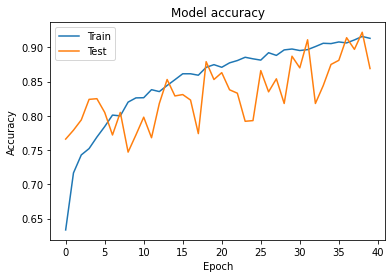

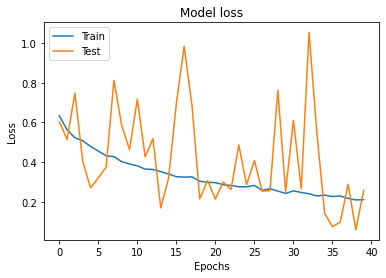

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Evaluating the Model
Evaluating the model with test data. 

In [15]:
classifier.load_weights("/content/drive/My Drive/DeepLearning/best_model_v4.hdf5")
evaluation = classifier.evaluate_generator(test_set)
print('test loss, test accuracy: ', evaluation)

test loss, test accuracy:  [0.10667043924331665, 0.9660000205039978]


#Testing

Manually testing with normal pictures.

In [9]:
classifier.load_weights("/content/drive/My Drive/DeepLearning/best_model_v4.hdf5")


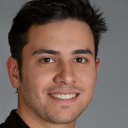

{'fake': 0, 'real': 1}
[[0.00096008]]
fake


In [10]:
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/DeepLearning/data/unzipped/project_data/test_set/fake/00075.png', target_size = (128, 128))
display(test_image)
test_image = image.img_to_array(test_image)/255
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
print(training_set.class_indices)
print(result)
if result[0][0] > 0.5:
    prediction = 'real'
else:
    prediction = 'fake'
print(prediction)